In [1]:
import os 
import imageio.v3

FILE_PATH = "./images/x-rays/pneumonia-xray/train/normal/"

original_img = imageio.v3.imread(os.path.join(FILE_PATH, "IM-0115-0001.jpeg"))

### Shape of the X-ray images

In [2]:
print(f"Shape of the image: ", original_img.shape)
print(f"Data Type of the image: ", original_img.dtype)

Shape of the image:  (1858, 2090)
Data Type of the image:  uint8


### Displaying the image

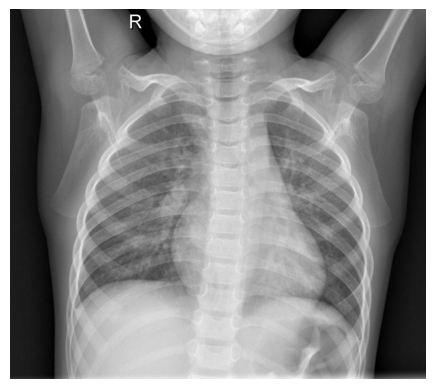

In [3]:
import matplotlib.pyplot as plt

plt.imshow(original_img, cmap="gray")
plt.axis("off")
plt.show()

### List all the Image from the trained normal folder.

In [ ]:
import glob

image_dir = "./images/x-rays/pneumonia-xray/train/normal/"
# Supported image file extensions
image_extensions = ['*.jpg', '*.jpeg', '*.png']

image_list = []

for ext in image_extensions:
    image_files = glob.glob(os.path.join(image_dir, ext))
    image_list.extend(image_files)

print("LIst of image files in Train/normal")
for image_path in image_list:
    
    print(image_path)


### Creating a list of first 10 images

In [5]:
import numpy as np
num_img = 10
arr = []

for i, img in enumerate(image_list):
    if(i == num_img):
        break
    else:
        temp_img = imageio.v3.imread(f"{img}")
        arr.append(temp_img)


Creating GIF from imges

In [7]:
GIF_PATH = os.path.join("./images/","x-ray_img.gif")
imageio.mimwrite(GIF_PATH, arr, format=".gif", fps=1)

![Alt text](output%20images/x-ray_img.gif)

In [8]:
# gif_file = "./images/x-rays/pneumonia-xray/train"
# gif_img = imageio.v3.imread("images/x-ray_img.gif")

# plt.imshow(gif_img)
# plt.axis("off")
# plt.show()

## Edge detections using various filter methods

IN biomedical data, 2D "edge" is important for particular features detection in an image.

## Laplace filter with Gaussian second derivatives

In [9]:
from scipy import ndimage

xray_LG = ndimage.gaussian_laplace(
    original_img,
    sigma=1
)

In [10]:
def plot_xray(image1, image2, title1="Original", title2="Image2"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

    axes[0].set_title(title1)
    axes[0].imshow(image1, cmap="gray")
    axes[1].set_title(title2)
    axes[1].imshow(image2, cmap="gray")
    for i in axes:
        i.axis("off")
    plt.show()

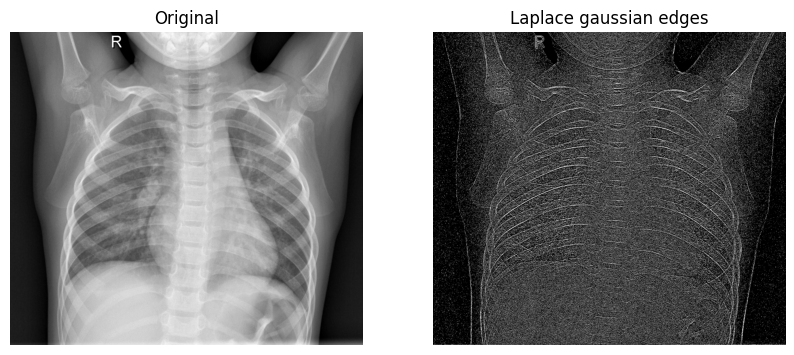

In [11]:
plot_xray(original_img,xray_LG, title2="Laplace gaussian edges")

## Gaussian Gradient magnitude 

In [12]:
xray_GM = ndimage.gaussian_gradient_magnitude(
    original_img,
    sigma=2
)

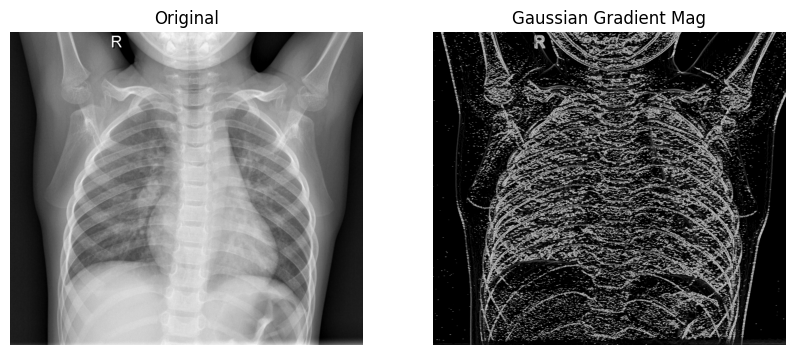

In [13]:
plot_xray(original_img, xray_GM, title2="Gaussian Gradient Mag")

## Sobel - Feldman operator

In [14]:
x_sb = ndimage.sobel(original_img, axis=0)
y_sb = ndimage.sobel(original_img, axis=1)

sobel_img = np.hypot(x_sb, y_sb)
sobel_img *= 255.0 / np.max(sobel_img)




In [28]:
print("The data type before: ", sobel_img.dtype)

sobel_img = sobel_img.astype("float32")

print("The data type after: ", sobel_img.dtype)

The data type before:  float32
The data type after:  float32


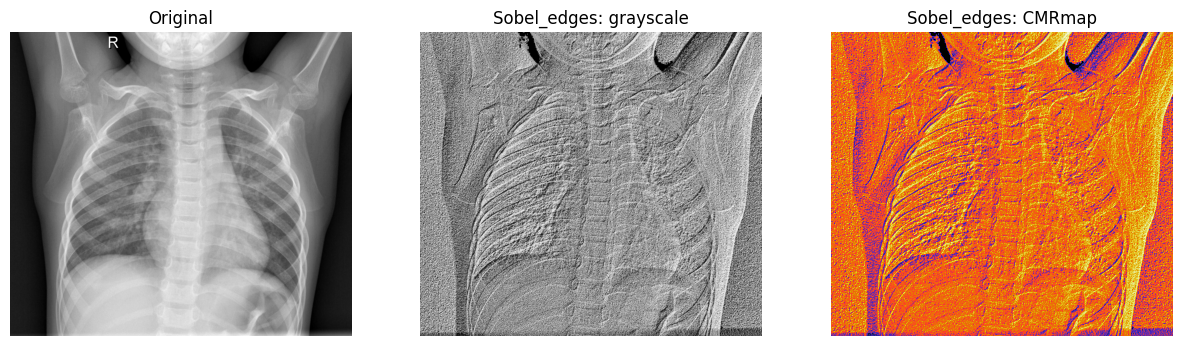

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Sobel_edges: grayscale")
axes[1].imshow(sobel_img, cmap="gray")
axes[2].set_title("Sobel_edges: CMRmap")
axes[2].imshow(sobel_img, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

## The canny filter

In [17]:
fourier_gau = ndimage.fourier_gaussian(
    original_img,
    sigma=0.05
)

x_prewitt = ndimage.prewitt(fourier_gau, axis=0)
y_prewitt = ndimage.prewitt(fourier_gau, axis=1)

xray_canny = np.hypot(x_prewitt, y_prewitt)
xray_canny *= 255.0 / np.max(xray_canny)

print(f"the data type - {xray_canny.dtype}")



the data type - float64


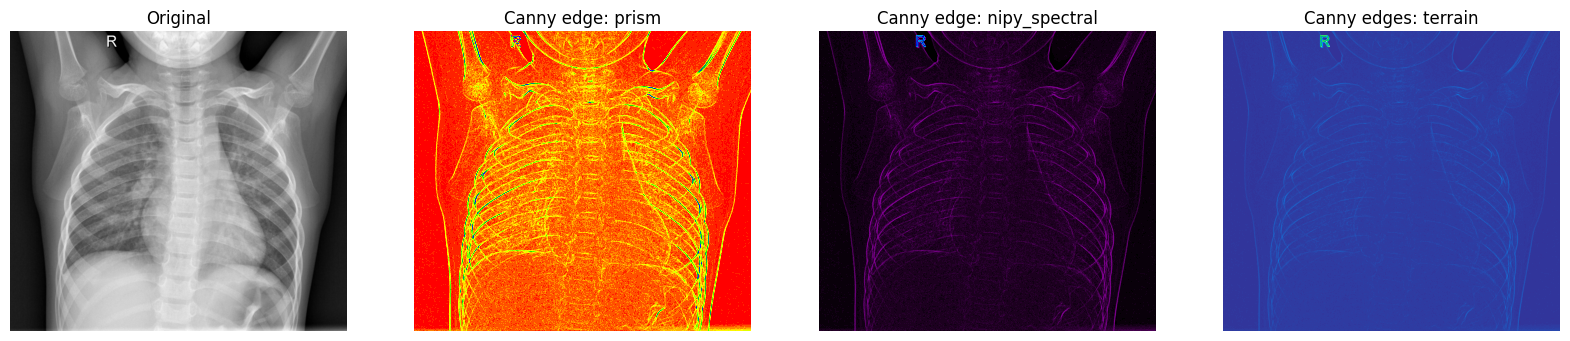

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Canny edge: prism")
axes[1].imshow(xray_canny, cmap="prism")
axes[2].set_title("Canny edge: nipy_spectral")
axes[2].imshow(xray_canny, cmap="nipy_spectral")
axes[3].set_title("Canny edges: terrain")
axes[3].imshow(xray_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

### How to apply mask to x-ray images for extracting important feature from the raw images?

In [19]:
print("The data type of the X-ray image is: ", original_img.dtype)
print("The minimum pixel value is: ", np.min(original_img))
print("The maximum pixel value is: ", np.max(original_img))
print("The average pixel value is: ", np.mean(original_img))
print("The median pixel value is: ", np.median(original_img))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  128.90747832983968
The median pixel value is:  137.0


Visualize pixel density distribution of X-ray images

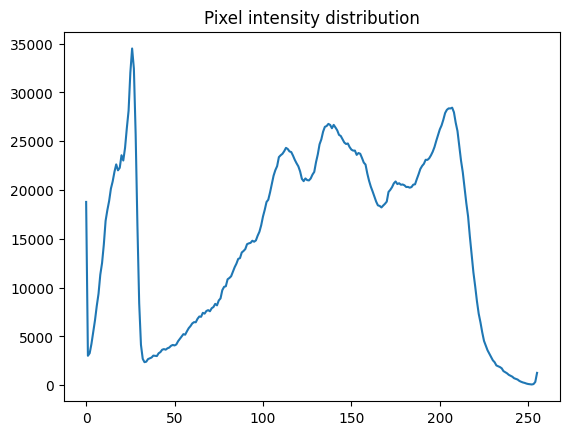

In [20]:
pixel_int_dist = ndimage.histogram(
    original_img,
    min=np.min(original_img),
    max=np.max(original_img),
    bins=256
)

plt.plot(pixel_int_dist)
plt.title("Pixel intensity distribution")
plt.show()

Masking using np.where()

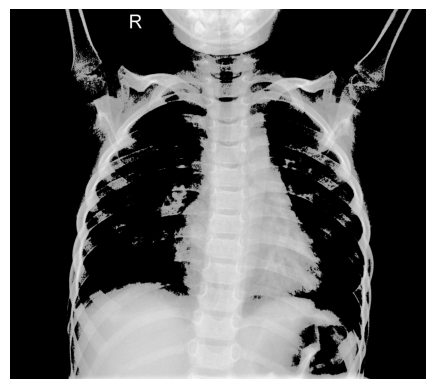

In [21]:
xray_img_mask_noisy = np.where(
    original_img >150,
    original_img, 0
)

plt.imshow(xray_img_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

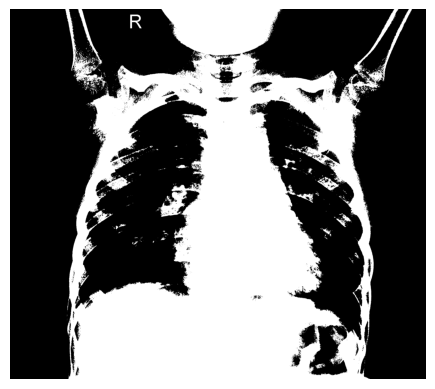

In [22]:
xray_img_mask_noisy = np.where(
    original_img >150,
    1, 0
)

plt.imshow(xray_img_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

Multiple image visualization

In [23]:
images = [
    imageio.v3.imread(image_list[i]) for i in range(9)
]

In [24]:
n_images = len(images)
n_rows = 3
n_cols = (n_images + 1) // n_rows

PLotting images

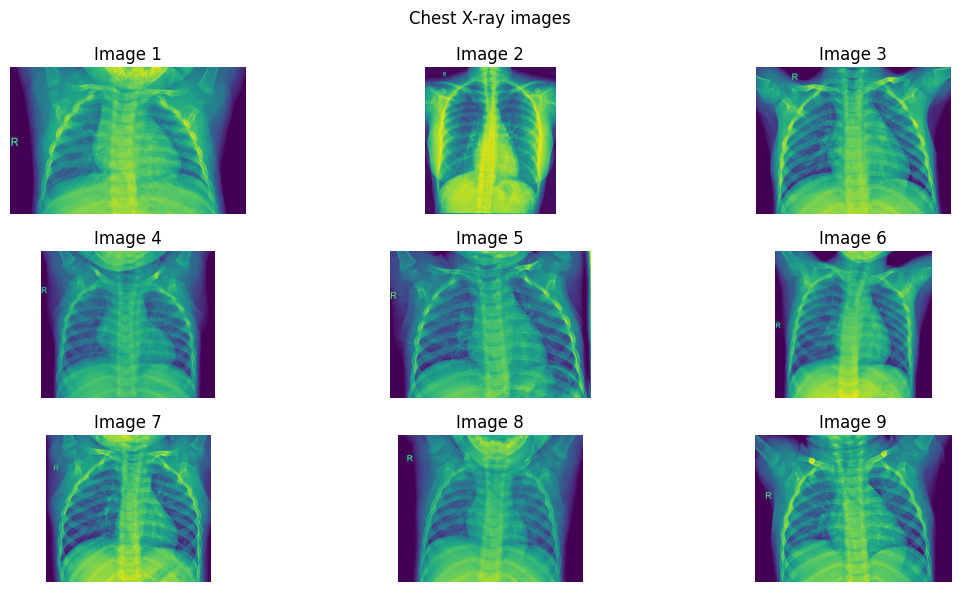

In [25]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].axis("off")

for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

fig.suptitle("Chest X-ray images")
plt.tight_layout()
plt.show()




Image pixel density distribution plot.

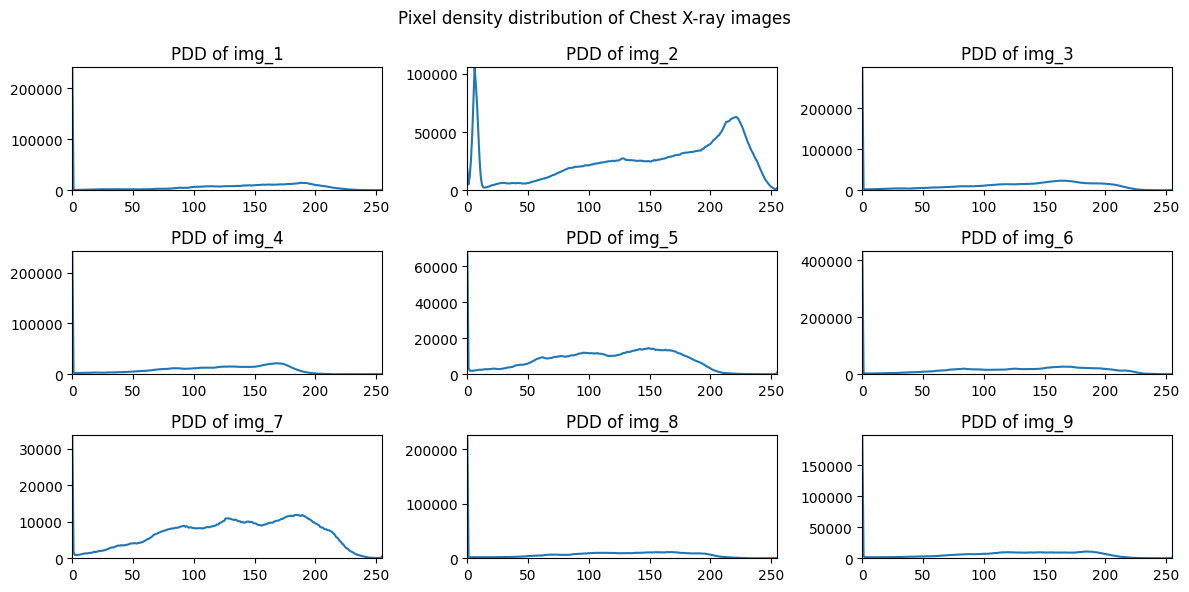

In [31]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:

        pixel_int_dist = ndimage.histogram(images[i],
            min=np.min(images[i]),
            max=np.max(images[i]),
            bins=256)
        axes[i].plot(pixel_int_dist)
        axes[i].set_xlim(0, 255)
        axes[i].set_ylim(0, np.max(pixel_int_dist))
        axes[i].set_title(f"PDD of img_{i+1}")


fig.suptitle("Pixel density distribution of Chest X-ray images")
plt.tight_layout()
plt.show()

Extracting Features from images using numpy where() method

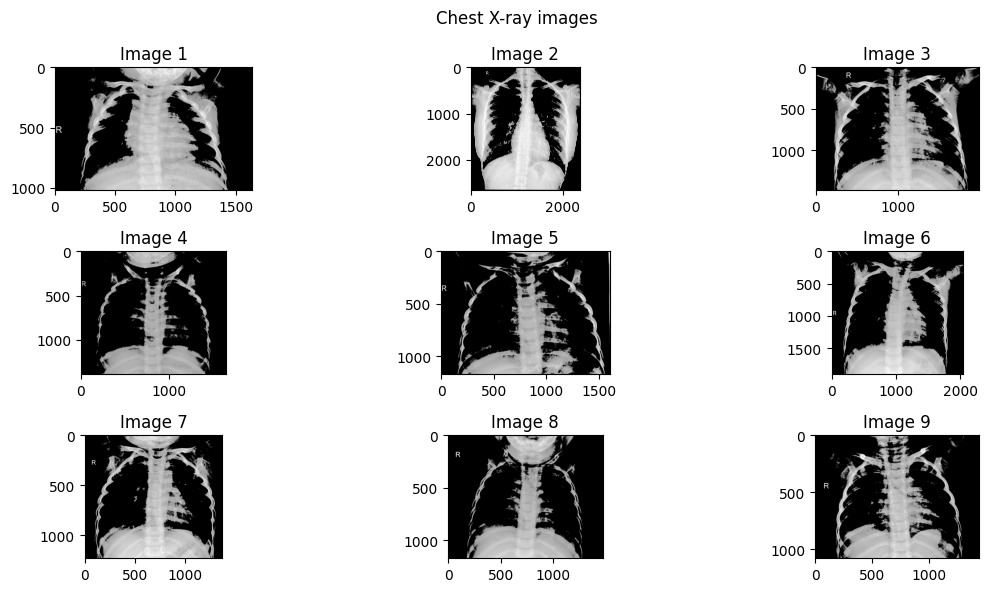

In [27]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:
        noisy_image = np.where(images[i] >150, images[i], 0 )
        axes[i].imshow(noisy_image, cmap="gray")
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].axis("off")

for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

fig.suptitle("Chest X-ray images")
plt.tight_layout()
plt.show()